# Final Report Code

## Basic EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as patches

## COLORS and SCHEMES

In [ ]:
BGCOLOR = '#ebeef0'
COLORS = [ "#244685", "#f08832",'#298c57']
heading = '#1c1c1b'
bar_green = '#759c8f'
bar_retention = '#3b5e75'
bar_attrition = '#a85964'

c1_alpha = 0.6
c2_alpha = 0.9
c3_alpha = 0.6

In [ ]:
df_hr = pd.read_excel("HR_Employee_Data.xlsx")
df_hr.set_index('Emp_Id')
df_hr.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df_hr_avg = df_hr.groupby('Department').median()['satisfaction_level']
df_hr_avg

Department
IT             0.660
RandD          0.650
accounting     0.610
hr             0.610
management     0.655
marketing      0.640
product_mng    0.640
sales          0.640
support        0.650
technical      0.640
Name: satisfaction_level, dtype: float64

In [ ]:
Dept = {"Department":{'hr': 'Human \nResources',
 'accounting': 'Accounting',
 'technical': 'Technical',
 'support': 'Support',
 'sales': 'Sales',
 'marketing': 'Marketing',
 'IT': 'Information \nTechnology',
 'product_mng': 'Product \nManagement',
 'RandD': 'Research & \nDevelopment',
 'management': 'Management'}}
df_hr = df_hr.replace(Dept)

In [ ]:
df1 = pd.crosstab(df_hr['Department'], df_hr['left'], normalize = 'index')
df1 = df1.sort_values(1, ascending=False)

In [ ]:
df2 = pd.crosstab(df_hr['Department'], df_hr['salary'], normalize = 'index')
df2 = df2.sort_values('high', ascending=False)

In [ ]:
df_dept_sat = df_hr[['Department', 'satisfaction_level']].copy()

In [ ]:
conditions = [
    (df_dept_sat['satisfaction_level'] <= 0.25),
    (df_dept_sat['satisfaction_level'] > 0.25) & (df_dept_sat['satisfaction_level'] <= 0.50),
    (df_dept_sat['satisfaction_level'] > 0.50) & (df_dept_sat['satisfaction_level'] <= 0.75),
    (df_dept_sat['satisfaction_level'] > 0.75)
    ]

values = ['happy','satisfied', 'not_satisfied', 'sad']
df_dept_sat['satisfaction'] =  np.select(conditions, values[::-1])

In [ ]:
df_dept_sat.head()

,Department,satisfaction_level,satisfaction
0,Sales,0.38,not_satisfied
1,Sales,0.80,happy
2,Sales,0.11,sad
3,Sales,0.72,satisfied
4,Sales,0.37,not_satisfied


In [ ]:
df3 = pd.crosstab(df_dept_sat['Department'], df_dept_sat['satisfaction'], normalize = 'index')
df3['contented'] = df3['happy'] + df3['satisfied']
df3 = df3.sort_values('contented', ascending = True)

happy = df3['happy']
satisfied = df3['satisfied']
not_satisfied = df3['not_satisfied']
sad = df3['sad']
contented = df3['contented']

In [ ]:
contented = contented.reindex(index = df1.index)

In [ ]:
index_list = list(df1.index)

In [ ]:
index_list

['Human \nResources',
 'Accounting',
 'Technical',
 'Support',
 'Sales',
 'Marketing',
 'Information \nTechnology',
 'Product \nManagement',
 'Research & \nDevelopment',
 'Management']

In [ ]:
index_list[7] = 'Product \nManagement'
index_list[8] = 'R & D'
index_list

['Human \nResources',
 'Accounting',
 'Technical',
 'Support',
 'Sales',
 'Marketing',
 'Information \nTechnology',
 'Product \nManagement',
 'R & D',
 'Management']

##  Figure 5: Comparison of attrition rate and job satisfaction for each department

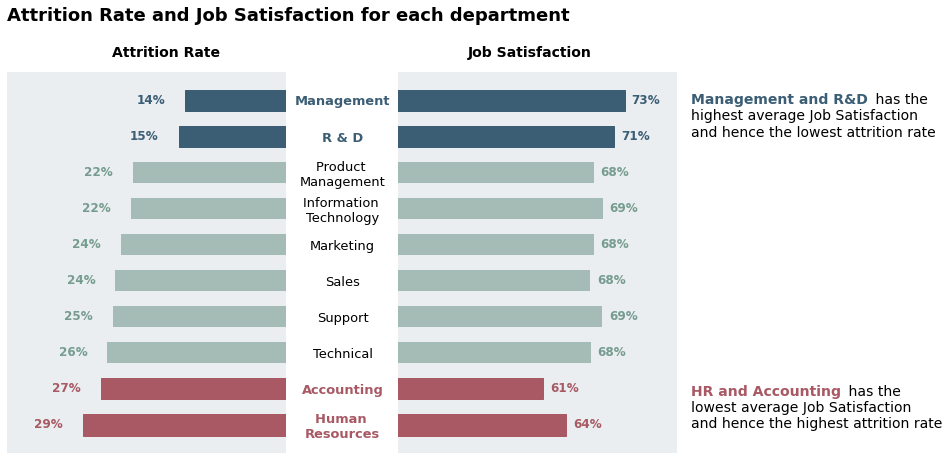

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,7), sharey=True)
ax = ax.flatten()

ax[0].barh(df1.index, df1[1], color = bar_green, height = 0.6, label = 'Attrition Rate', alpha = 0.6 )
ax[0].set_xlim(0.0,0.4)
ax[1].barh(np.arange(10), contented, color = bar_green , height = 0.6, label = 'Satisfaction level', alpha = 0.6 )

ax[1].set_xlim(0.4,0.8)

ax[0].invert_xaxis()
ax[0].yaxis.tick_right()

fig.patch.set_facecolor('white')
ax[0].set_facecolor(BGCOLOR)
ax[1].set_facecolor(BGCOLOR)

ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['top'].set_visible(False)

for i, tick in enumerate(ax[0].yaxis.get_majorticklabels()):
    tick.set_horizontalalignment("center")
    if i in [0,1]:
        tick.set_color(bar_attrition)
        tick.set_weight('bold')
    if i in [8,9]:
        tick.set_color(bar_retention)
        tick.set_weight('bold')
    
ax[1].set_yticks(np.arange(10))
ax[0].set_yticklabels(index_list,fontsize=13)
ax[1].tick_params(axis='x', bottom=False, labelbottom=False ,direction='out')
ax[0].tick_params(axis='x', bottom=False, labelbottom=False ,direction='out')
ax[0].tick_params(axis='y', right=False, direction='out', pad = 53)
ax[1].tick_params(axis='y', left=False, direction='out')

for i, rect in enumerate(ax[1].patches):
    height = rect.get_height()
    width = rect.get_width()
    label = f"{100*width:.0f}%"
    x = rect.get_x()+ width+0.01
    y = rect.get_y()+height/2-0.1
    
    if i in [0,1]:
        ax[1].annotate(label, (x, y),color=bar_attrition,size=12, weight = 'bold')
    elif i in [8,9]:
        ax[1].annotate(label, (x, y),color=bar_retention,size=12, weight = 'bold')
    else:
        ax[1].annotate(label, (x, y),color=bar_green,size=12, weight = 'bold')
    
for i, rect in enumerate(ax[0].patches):
    height = rect.get_height()
    width = rect.get_width()
    label = f"{100*width:.0f}%"
    x = rect.get_x()+ width +0.07
    y = rect.get_y()+height/2-0.1
    if i in [0,1]:
        ax[0].annotate(label, (x, y),color= bar_attrition ,size=12, weight = 'bold')
    elif i in [8,9]:
        ax[0].annotate(label, (x, y),color=bar_retention,size=12, weight = 'bold')
    else:
        ax[0].annotate(label, (x, y),color=bar_green,size=12, weight = 'bold')

ax[0].annotate("Attrition Rate and Job Satisfaction for each department",
            (0.4, 11.2), size=18, color='black', annotation_clip=False, weight = 'bold')
ax[0].annotate("Attrition Rate", 
            (0.25, 10.2), size=14, color='black', annotation_clip=False, weight = 'bold')
ax[1].annotate("Job Satisfaction", 
            (0.5, 10.2), size=14, color='black', annotation_clip=False, weight = 'bold')

for i, rect in enumerate(ax[0].patches):
    if i in np.array([0,1]):
        rect.set_color(bar_attrition)
        rect.set_edgecolor(bar_attrition)
        rect.set_alpha(1)

for i, rect in enumerate(ax[1].patches):
    if i in np.array([0,1]):
        rect.set_color(bar_attrition)
        rect.set_edgecolor(bar_attrition)
        rect.set_alpha(1)

for i, rect in enumerate(ax[0].patches):
    if i in np.array([8,9]):
        rect.set_color(bar_retention)
        rect.set_edgecolor(bar_retention)
        rect.set_alpha(1)

for i, rect in enumerate(ax[1].patches):
    if i in np.array([8,9]):
        rect.set_color(bar_retention)
        rect.set_edgecolor(bar_retention)
        rect.set_alpha(1)
        
        


ax[1].annotate( "                                         has the \nhighest average Job Satisfaction \nand hence the lowest attrition rate",
            (0.82, 8.3-0.3), size=14, color='black', annotation_clip=False)
ax[1].annotate("Management and R&D",
            (0.82, 9.2-0.3), size=14, color=bar_retention, annotation_clip=False, weight = 'bold')

ax[1].annotate("                                   has the \nlowest average Job Satisfaction \nand hence the highest attrition rate",
            (0.82, 0.01-0.1), size=14, color='black', annotation_clip=False)

ax[1].annotate("HR and Accounting" ,
            (0.82, 0.9-0.1), size=14, color=bar_attrition, annotation_clip=False, weight = 'bold')

fig.subplots_adjust(wspace=0.40)
plt.savefig('FRplot1.png')
plt.show()

# EDA for each Cluster

In [ ]:
df_hr1 = df_hr.copy()

In [ ]:
df_hr1['average_montly_hours'] = (df_hr1['average_montly_hours']-df_hr1['average_montly_hours'].min())/(df_hr1['average_montly_hours'].max()-df_hr1['average_montly_hours'].min())


## Clusters

In [ ]:
df_cluster1 = df_hr1[( (df_hr1['satisfaction_level']<0.15)) 
      & ((df_hr1['average_montly_hours']>0.63))& (df_hr1['left']==1)]
df_cluster2 = df_hr1[((df_hr1['satisfaction_level']>0.35) & (df_hr1['satisfaction_level']<0.45)) 
      & ((df_hr1['average_montly_hours']>0.1) & (df_hr1['average_montly_hours']<0.35))& (df_hr1['left']==1)]
df_cluster3 = df_hr1[((df_hr1['satisfaction_level']>0.69) & (df_hr1['satisfaction_level']<0.91)) 
      & ((df_hr1['average_montly_hours']>0.59) & (df_hr1['average_montly_hours']<0.84))& (df_hr1['left']==1)]

### Cluster 1

In [ ]:
A = df_cluster1['Department'].value_counts()/sum(df_cluster1['Department'].value_counts())*100
A =A.sort_values()

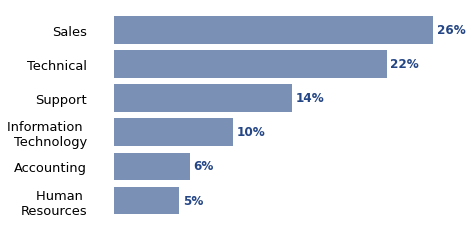

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

ax.barh(A[4:10].index, A[4:10], color = COLORS[0], alpha = 0.6) #cluster1color

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yticks(np.arange(6))
ax.set_yticklabels(A[4:10].index,fontsize=13, color='black')
ax.tick_params(axis='x', bottom=False, labelbottom=False ,direction='out')
ax.tick_params(axis='x', bottom=False, labelbottom=False ,direction='out')
ax.tick_params(axis='y', right=False, direction='out', pad = 24)
ax.tick_params(axis='y', left=False, direction='out')

for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_width()
    label = f"{width:.0f}%"
    x = rect.get_x()+ width+0.3
    y = rect.get_y()+height/2-0.1
    ax.annotate(label, (x, y),color=COLORS[0],size=12, weight = 'bold')

plt.show()

In [ ]:
df_cluster1['number_project'].value_counts()/sum(df_cluster1['number_project'].value_counts())

6    0.682022
7    0.266292
5    0.041573
4    0.003371
3    0.003371
2    0.003371
Name: number_project, dtype: float64

In [ ]:
df_cluster1['salary'].value_counts()/sum(df_cluster1['salary'].value_counts())

low       0.593258
medium    0.389888
high      0.016854
Name: salary, dtype: float64

### Cluster 2

In [ ]:
B = df_cluster2['Department'].value_counts()/sum(df_cluster2['Department'].value_counts())*100
B =B.sort_values()
B

Management                   2.380952
Research & \nDevelopment     2.688172
Product \nManagement         5.606759
Accounting                   6.067588
Marketing                    6.451613
Information \nTechnology     7.296467
Human \nResources            7.373272
Support                     16.205837
Technical                   16.743472
Sales                       29.185868
Name: Department, dtype: float64

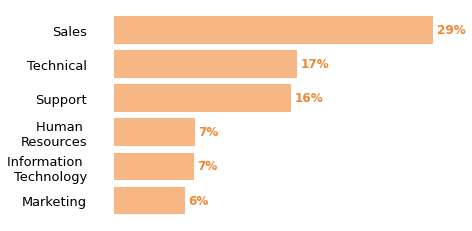

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

ax.barh(B[4:10].index, B[4:10], color = COLORS[1], alpha = 0.6) #cluster1color

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yticks(np.arange(6))
ax.set_yticklabels(B[4:10].index,fontsize=13, color='black')
ax.tick_params(axis='x', bottom=False, labelbottom=False ,direction='out')
ax.tick_params(axis='x', bottom=False, labelbottom=False ,direction='out')
ax.tick_params(axis='y', right=False, direction='out', pad = 24)
ax.tick_params(axis='y', left=False, direction='out')

for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_width()
    label = f"{width:.0f}%"
    x = rect.get_x()+ width+0.3
    y = rect.get_y()+height/2-0.1
    ax.annotate(label, (x, y), color = COLORS[1], size=12, weight = 'bold')

plt.show()

In [ ]:
df_cluster2['number_project'].value_counts()/sum(df_cluster2['number_project'].value_counts())

2    0.994624
6    0.003072
5    0.000768
4    0.000768
3    0.000768
Name: number_project, dtype: float64

In [ ]:
df_cluster2['number_project'].value_counts()

2    1295
6       4
5       1
4       1
3       1
Name: number_project, dtype: int64

In [ ]:
df_cluster2['time_spend_company'].value_counts()

3    1293
4       6
6       3
Name: time_spend_company, dtype: int64

### Cluster 3

In [ ]:
C = 100*df_cluster3['Department'].value_counts()/sum(df_cluster3['Department'].value_counts())
C =C.sort_values(ascending = True)
C

Management                   2.695418
Human \nResources            4.043127
Research & \nDevelopment     4.043127
Accounting                   4.851752
Marketing                    6.738544
Product \nManagement         6.873315
Information \nTechnology     7.412399
Support                     16.172507
Technical                   17.520216
Sales                       29.649596
Name: Department, dtype: float64

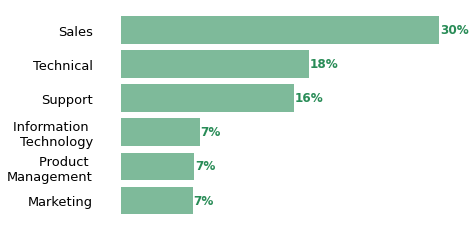

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

ax.barh(C[4:10].index, C[4:10], color  = COLORS[2], alpha = 0.6) #cluster1color

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yticks(np.arange(6))
ax.set_yticklabels(C[4:10].index,fontsize=13, color='black')
ax.tick_params(axis='x', bottom=False, labelbottom=False ,direction='out')
ax.tick_params(axis='x', bottom=False, labelbottom=False ,direction='out')
ax.tick_params(axis='y', right=False, direction='out', pad = 24)
ax.tick_params(axis='y', left=False, direction='out')

for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    width = rect.get_width()
    label = f"{width:.0f}%"
    x = rect.get_x()+ width+0.04
    y = rect.get_y()+height/2-0.1
    ax.annotate(label, (x, y),color = COLORS[2], size=12, weight = 'bold')

plt.show()

In [ ]:
df_cluster3['number_project'].value_counts()/sum(df_cluster3['number_project'].value_counts())

5    0.597035
4    0.382749
3    0.013477
2    0.005391
6    0.001348
Name: number_project, dtype: float64

In [ ]:
df_cluster3['salary'].value_counts()/sum(df_cluster3['salary'].value_counts())

low       0.595687
medium    0.385445
high      0.018868
Name: salary, dtype: float64

In [ ]:
df_cluster1['average_montly_hours'].mean(), df_cluster2['average_montly_hours'].mean(), df_cluster3['average_montly_hours'].mean()

(0.8470282474010282, 0.22224973800192313, 0.713076554903394)

## Spider Plot Preparation

In [ ]:
avg_c1 = df_cluster1.copy()

#avg_c1['number_project'] = (avg_c1['number_project']-avg_c1['number_project'].min())/(avg_c1['number_project'].max()-avg_c1['number_project'].min())
avg_c1['number_project'] = avg_c1['number_project']/10.0
#avg_c1['average_montly_hours'] = (avg_c1['average_montly_hours']-avg_c1['average_montly_hours'].min())/(avg_c1['average_montly_hours'].max()-avg_c1['average_montly_hours'].min())
avg_c1['promotion_last_5years'] = sum(df_cluster1['promotion_last_5years'])/len(df_cluster1)
avg_c1['salary1'] = avg_c1['salary']
salary = {"salary1":{"low": 0.333, "medium": 0.66666, "high": 0.99999}}
avg_c1 = avg_c1.replace(salary)
#avg_c1['salary1'] =(avg_c1['salary1']-avg_c1['salary1'].min())/(avg_c1['salary1'].max()-avg_c1['salary1'].min())


In [ ]:
avg_c2 = df_cluster2.copy()
#avg_c2['number_project'] = (avg_c2['number_project']-avg_c2['number_project'].min())/(avg_c2['number_project'].max()-avg_c2['number_project'].min())
avg_c2['number_project'] = avg_c2['number_project']/10.0
#avg_c2['average_montly_hours'] = (avg_c2['average_montly_hours']-avg_c2['average_montly_hours'].min())/(avg_c2['average_montly_hours'].max()-avg_c2['average_montly_hours'].min())
avg_c2['promotion_last_5years'] = sum(df_cluster2['promotion_last_5years'])/len(df_cluster2)
avg_c2['salary1'] = avg_c2['salary']
salary = {"salary1":{"low": 0.333, "medium": 0.66666, "high": 0.99999}}
avg_c2 = avg_c2.replace(salary)
#avg_c1['salary1'] =(avg_c1['salary1']-avg_c1['salary1'].min())/(avg_c1['salary1'].max()-avg_c1['salary1'].min())


In [ ]:
avg_c2['number_project']

0        0.2
4        0.2
5        0.2
9        0.2
13       0.2
        ... 
14992    0.2
14994    0.2
14995    0.2
14996    0.2
14998    0.2
Name: number_project, Length: 1302, dtype: float64

In [ ]:
avg_c3 = df_cluster3.copy()
#avg_c3['number_project'] = (avg_c3['number_project']-avg_c3['number_project'].min())/(avg_c3['number_project'].max()-avg_c3['number_project'].min())
avg_c3['number_project'] = avg_c3['number_project']/10.0
#avg_c3['average_montly_hours'] = (avg_c3['average_montly_hours']-avg_c3['average_montly_hours'].min())/(avg_c3['average_montly_hours'].max()-avg_c3['average_montly_hours'].min())
avg_c3['promotion_last_5years'] = sum(df_cluster3['promotion_last_5years'])/len(df_cluster3)
avg_c3['salary1'] = avg_c3['salary']
salary = {"salary1":{"low": 0.333, "medium": 0.66666, "high": 0.99999}}
avg_c3 = avg_c3.replace(salary)
#avg_c1['salary1'] =(avg_c1['salary1']-avg_c1['salary1'].min())/(avg_c1['salary1'].max()-avg_c1['salary1'].min())


In [ ]:
avg_c3.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary1
1,IND28133,0.80,0.86,0.5,0.775701,6,0,1,0.001348,Sales,medium,0.66666
3,IND30478,0.72,0.87,0.5,0.593458,5,0,1,0.001348,Sales,low,0.33300
8,IND27336,0.89,1.00,0.5,0.598131,5,0,1,0.001348,Sales,low,0.33300
12,IND13556,0.84,0.92,0.4,0.644860,5,0,1,0.001348,Sales,low,0.33300
17,IND21424,0.78,0.99,0.4,0.742991,6,0,1,0.001348,Sales,low,0.33300


## Figure 8: Detailed analysis of the clusters with high attrition

In [ ]:
avg_c1_final = avg_c1[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',  'salary1']].mean()
avg_c2_final = avg_c2[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',  'salary1']].mean()
avg_c3_final = avg_c3[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'salary1']].mean()

In [ ]:
c1_radarlist = list(avg_c1_final)
c1_radarlist = c1_radarlist + c1_radarlist[:1]

c2_radarlist = list(avg_c2_final)
c2_radarlist = c2_radarlist + c2_radarlist[:1]

c3_radarlist = list(avg_c3_final)
c3_radarlist = c3_radarlist + c3_radarlist[:1]



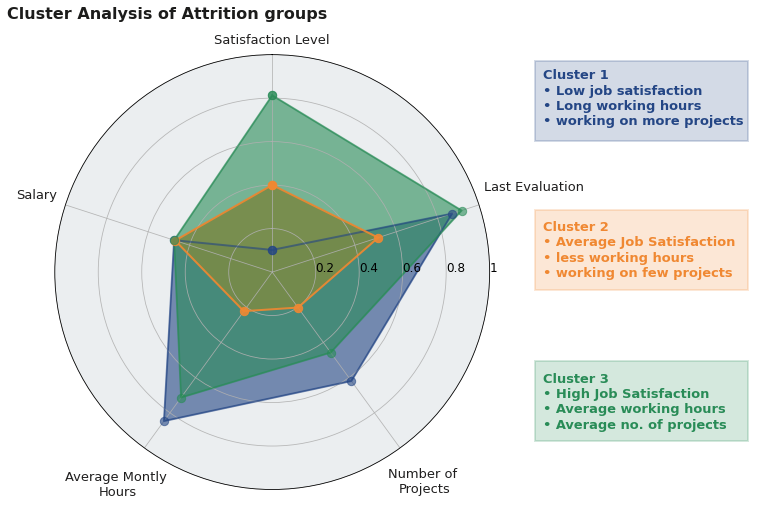

In [ ]:
import math
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(polar=True)

fig.patch.set_facecolor('white') #BGCOLOR
ax.set_facecolor(BGCOLOR)


categories = ['Satisfaction Level', 'Last Evaluation', 'Number of \nProjects', 
              'Average Montly \nHours', 'Salary']
N_Cat = len(categories)

angles = [n/N_Cat*2*math.pi for n in range(N_Cat)]

angles += angles[:1]

ax.grid(alpha=0.9)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)



ax.plot(angles, c1_radarlist, c=COLORS[0], label='cluster 1',alpha=c1_alpha,  linewidth=2)
ax.fill(angles, c1_radarlist, c=COLORS[0], alpha=c1_alpha)
ax.scatter(angles, c1_radarlist, s=70, c=COLORS[0], zorder=10, alpha=c1_alpha)

ax.plot(angles, c2_radarlist, c=COLORS[1], label='cluster 2', alpha=c2_alpha, linewidth=2)
ax.fill(angles, c2_radarlist, c=COLORS[1], alpha=c2_alpha)
ax.scatter(angles, c2_radarlist, s=70, c=COLORS[1], zorder=10, alpha=c2_alpha)

ax.plot(angles, c3_radarlist, c=COLORS[2], label='cluster 3', alpha=c3_alpha, linewidth=2)
ax.fill(angles, c3_radarlist, c=COLORS[2], alpha=c3_alpha)
ax.scatter(angles, c3_radarlist, s=70, c=COLORS[2], zorder=10, alpha=c3_alpha)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=13, color = '#1f1e1e')


#ax.hlines(0, 0, 5)

ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1])
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_ylim(0, 1)


ax.tick_params(axis='y', bottom=False, labelbottom=False )

for x,y in zip([np.pi/2]*6, [ 0.2, 0.4, 0.6, 0.8, 1]):
    label = y
    ax.annotate(label, (x, y),color='black',size=12)

# ax.spines["start"].set_color("none")
# ax.spines["polar"].set_color("none")

plt.setp(ax.yaxis.get_ticklabels(), visible=False)
XTICKS = ax.xaxis.get_major_ticks()   
XTICKS[1].set_pad(47)
XTICKS[2].set_pad(31)
XTICKS[3].set_pad(35)
XTICKS[4].set_pad(20)



x1 = 0.71; y1 = 0.85


ax.annotate('Cluster 1', (x1, y1), (x1, y1),textcoords='figure fraction', color=COLORS[0], 
            size=13, verticalalignment='center',annotation_clip=False, weight = 'bold')
ax.annotate('\u2022 Low job satisfaction', (x, y),(x1, y1-0.03),textcoords='figure fraction', color=COLORS[0], 
            size=13, verticalalignment='center',annotation_clip=False, weight = 'bold')
ax.annotate('\u2022 Long working hours', (x, y),(x1, y1-0.06),textcoords='figure fraction', color=COLORS[0], 
            size=13, verticalalignment='center',annotation_clip=False, weight = 'bold')
ax.annotate('\u2022 working on more projects', (x, y),(x1, y1-0.09),textcoords='figure fraction', color=COLORS[0], 
            size=13, verticalalignment='center',annotation_clip=False, weight = 'bold')


y2 = 0.3
ax.annotate('Cluster 2', (x1, y1), (x1, y1-y2),textcoords='figure fraction', color=COLORS[1], 
            size=13, verticalalignment='center',annotation_clip=False, weight = 'bold')
ax.annotate('\u2022 Average Job Satisfaction', (x, y),(x1, y1-0.03-y2),textcoords='figure fraction', color=COLORS[1], 
            size=13, verticalalignment='center',annotation_clip=False, weight = 'bold')
ax.annotate('\u2022 less working hours', (x, y),(x1, y1-0.06-y2),textcoords='figure fraction', color=COLORS[1], 
            size=13, verticalalignment='center',annotation_clip=False, weight = 'bold')
ax.annotate('\u2022 working on few projects', (x, y),(x1, y1-0.09-y2),textcoords='figure fraction', color=COLORS[1], 
            size=13, verticalalignment='center',annotation_clip=False, weight = 'bold')
#                     arrowprops=dict(arrowstyle='-', color='r'),


ax.annotate('Cluster 3', (x1, y1), (x1, y1-2*y2),textcoords='figure fraction', color=COLORS[2], 
            size=13, verticalalignment='center',annotation_clip=False, weight = 'bold')
ax.annotate('\u2022 High Job Satisfaction', (x, y),(x1, y1-0.03-2*y2),textcoords='figure fraction', color=COLORS[2], 
            size=13, verticalalignment='center',annotation_clip=False, weight = 'bold')
ax.annotate('\u2022 Average working hours', (x, y),(x1, y1-0.06-2*y2),textcoords='figure fraction', color=COLORS[2], 
            size=13, verticalalignment='center',annotation_clip=False, weight = 'bold')
ax.annotate('\u2022 Average no. of projects', (x, y),(x1, y1-0.09-2*y2),textcoords='figure fraction', color=COLORS[2], 
            size=13, verticalalignment='center',annotation_clip=False, weight = 'bold')
#                     arrowprops=dict(arrowstyle='-', color='r'),                    


a,b =(535,365)
p1 = fig.patches.extend([plt.Rectangle(xy=(a,b),  # point of origin.
        width= 213,
        height= 80,
        linewidth=2.,
        edgecolor=COLORS[0],
        facecolor = COLORS[0],
        alpha=0.2,
        clip_on=False)])

p2 = fig.patches.extend([plt.Rectangle((a,b-149),  # point of origin.
        width= 213,
        height= 80,
        linewidth=2.,
        edgecolor=COLORS[1],
        facecolor = COLORS[1],
        alpha=0.2,
        clip_on=False)])

p3 = fig.patches.extend([plt.Rectangle((a,b-2*150),  # point of origin.
        width= 213,
        height= 80,
        linewidth=2.,
        edgecolor=COLORS[2],
        facecolor = COLORS[2],
        alpha=0.2,
        clip_on=False)])


import matplotlib.patches as mpatches


C1_patch = mpatches.Patch(color=COLORS[0], label='Cluster 1', alpha = 0.5)
C2_patch = mpatches.Patch(color= COLORS[1], label='Cluster 2',  alpha = 0.9)
C3_patch = mpatches.Patch(color=COLORS[2], label='Cluster 3',  alpha = 0.5)
#plt.legend(bbox_to_anchor=(1.05, 1.05), handles=[C1_patch, C2_patch, C3_patch], prop={'size': 13, 'weight': 'bold'})

ax.annotate('Cluster Analysis of Attrition groups',(-0.8, 1.699), color=heading, 
            size=16, verticalalignment='center',annotation_clip=False, weight = 'bold')


plt.show()

### Note: For this spiderplot, the basic template has been referred from python graph gallery